In [ ]:
!pip install pandas openpyxl xlrd

In [ ]:
import pandas as pd
from google.colab import files

# Lista com os arquivos
arquivos = [
    "/content/tag_lastfm_full_merged_spotify_2018.xlsx",
    "/content/tag_lastfm_full_merged_spotify_2019.xlsx",
    "/content/tag_lastfm_full_merged_spotify_2020.xlsx",
    "/content/tag_lastfm_full_merged_spotify_2021.xlsx",
    "/content/tag_lastfm_full_merged_spotify_2022.xlsx",
    "/content/tag_lastfm_full_merged_spotify_2023.xlsx"
]

# Lê cada planilha
dfs = [pd.read_excel(arq) for arq in arquivos]

# Junta tudo
df_final = pd.concat(dfs, ignore_index=True)

# ---- TRATAMENTOS ----
# 1. Coluna 'date' em formato DD/MM/YYYY
df_final["date"] = df_final["date"].dt.strftime("%d/%m/%Y")

# 2. Coluna 'genre' toda em minúsculas
df_final["genre"] = df_final["genre"].str.lower()

# Salva no Excel
df_final.to_excel("/content/planilha_unida.xlsx", index=False)

# Faz o download
files.download("/content/planilha_unida.xlsx")

print("Planilhas unidas com sucesso! Colunas 'date' e 'genre' formatadas.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Planilhas unidas com sucesso! Colunas 'date' e 'genre' formatadas.


In [ ]:
import pandas as pd
from google.colab import files

# Lista com os arquivos
arquivos = [
    "/content/tag_lastfm_full_merged_spotify_2018.xlsx",
    "/content/tag_lastfm_full_merged_spotify_2019.xlsx",
    "/content/tag_lastfm_full_merged_spotify_2020.xlsx",
    "/content/tag_lastfm_full_merged_spotify_2021.xlsx",
    "/content/tag_lastfm_full_merged_spotify_2022.xlsx",
    "/content/tag_lastfm_full_merged_spotify_2023.xlsx"
]

# Lê cada planilha
dfs = [pd.read_excel(arq) for arq in arquivos]

# Junta tudo
df_final = pd.concat(dfs, ignore_index=True)

# ---- TRATAMENTOS ----
# 1. Coluna 'date' em formato DD/MM/YYYY
df_final["date"] = df_final["date"].dt.strftime("%d/%m/%Y")

# --- TRATAMENTO release_date ---
df_final["release_date"] = pd.to_datetime(df_final["release_date"], errors="coerce")

# Formata para DD/MM/YYYY
df_final["release_date"] = df_final["release_date"].dt.strftime("%d/%m/%Y")

# 2. Coluna 'genre' toda em minúsculas
df_final["genre"] = df_final["genre"].str.lower()

# Salva no Excel
df_final.to_excel("/content/planilha_unida.xlsx", index=False)

# Faz o download
files.download("/content/planilha_unida.xlsx")

print("Planilhas unidas com sucesso! Colunas 'date' e 'genre' formatadas.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Planilhas unidas com sucesso! Colunas 'date' e 'genre' formatadas.


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31300 entries, 0 to 31299
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rank          31300 non-null  int64 
 1   title         31300 non-null  object
 2   artist        31300 non-null  object
 3   main_artist   31300 non-null  object
 4   date          31300 non-null  object
 5   genre         30930 non-null  object
 6   spotify_id    31156 non-null  object
 7   duration      31155 non-null  object
 8   release_date  31148 non-null  object
 9   api_title     31082 non-null  object
 10  status        31081 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.6+ MB


In [ ]:
df = pd.read_excel('/content/planilha_unida_enriquecida_final.xlsx')  # ou outro nome de arquivo

# Total de linhas
total_linhas = len(df)

# Calcular percentual de preenchimento por coluna
percentual_preenchimento = df.notnull().sum() / total_linhas * 100

# Exibir resultado formatado
print(percentual_preenchimento.round(2).sort_values(ascending=False))

rank            100.00
title           100.00
artist          100.00
main_artist     100.00
date            100.00
spotify_id       99.54
duration         99.54
release_date     99.51
status           99.30
api_title        99.30
genre            98.82
duration_ms      73.22
mode             73.22
tempo            73.22
dtype: float64


In [ ]:
inicio_pandemia = pd.to_datetime("11/03/2020")
fim_pandemia = pd.to_datetime("08/11/2021")

# Cria a coluna de período
def classificar_periodo(data):
    if pd.isna(data):
        return "desconhecido"
    if data < inicio_pandemia:
        return "pré-pandemia"
    elif inicio_pandemia <= data <= fim_pandemia:
        return "pandemia"
    else:
        return "pós-pandemia"

In [ ]:
import pandas as pd

# --- GARANTIR que 'date' está como datetime ---
df_final["date"] = pd.to_datetime(df_final["date"], dayfirst=True, errors="coerce")

# --- DEFINIR períodos ---
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

def classificar_periodo(data):
    if pd.isna(data):
        return "desconhecido"
    if data < inicio_pandemia:
        return "pré-pandemia"
    elif inicio_pandemia <= data <= fim_pandemia:
        return "pandemia"
    else:
        return "pós-pandemia"

df_final["periodo"] = df_final["date"].apply(classificar_periodo)

# --- AGRUPAR por período e gênero ---
generos_por_periodo = df_final.groupby(["periodo", "genre"]).size().reset_index(name="contagem")

# --- PEGAR top 5 e bottom 5 de cada período ---
resultados = {}
for periodo in generos_por_periodo["periodo"].unique():
    subset = generos_por_periodo[generos_por_periodo["periodo"] == periodo].sort_values("contagem", ascending=False)
    top5 = subset.head(5)
    bottom5 = subset.tail(5)
    resultados[periodo] = {"maiores": top5, "menores": bottom5}

# --- Exemplo de exibição ---
for periodo, valores in resultados.items():
    print(f"\n=== {periodo.upper()} ===")
    print("\nTOP 5 GÊNEROS:")
    print(valores["maiores"])
    print("\nBOTTOM 5 GÊNEROS:")
    print(valores["menores"])


=== PANDEMIA ===

TOP 5 GÊNEROS:
     periodo    genre  contagem
11  pandemia  country      1831
39  pandemia      pop      1588
44  pandemia      rap      1451
25  pandemia  hip-hop      1277
46  pandemia      rnb       567

BOTTOM 5 GÊNEROS:
     periodo        genre  contagem
7   pandemia    christmas         1
19  pandemia  folktronica         1
37  pandemia        noise         1
49  pandemia  rock n roll         1
53  pandemia        spain         1

=== PRÉ-PANDEMIA ===

TOP 5 GÊNEROS:
          periodo    genre  contagem
87   pré-pandemia  hip-hop      2710
102  pré-pandemia      pop      2254
69   pré-pandemia  country      1741
107  pré-pandemia      rap      1206
119  pré-pandemia     trap       662

BOTTOM 5 GÊNEROS:
          periodo              genre  contagem
65   pré-pandemia          christian         1
92   pré-pandemia              j-pop         1
105  pré-pandemia  progressive metal         1
112  pré-pandemia  singer-songwriter         1
116  pré-pandemia        

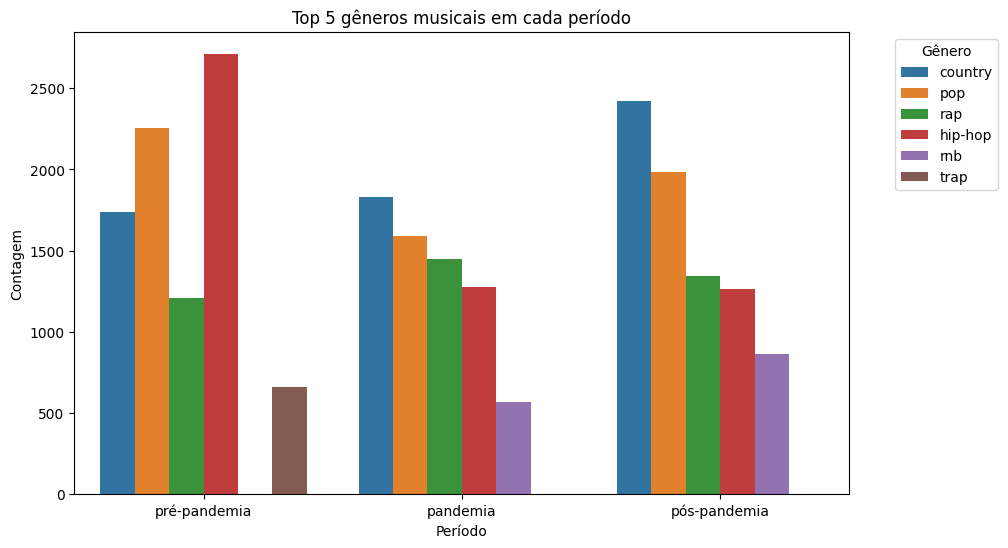

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- garantir datas ---
df_final["date"] = pd.to_datetime(df_final["date"], dayfirst=True, errors="coerce")

# --- definir períodos ---
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

def classificar_periodo(data):
    if pd.isna(data):
        return "desconhecido"
    if data < inicio_pandemia:
        return "pré-pandemia"
    elif inicio_pandemia <= data <= fim_pandemia:
        return "pandemia"
    else:
        return "pós-pandemia"

df_final["periodo"] = df_final["date"].apply(classificar_periodo)

# --- agrupar ---
generos_por_periodo = df_final.groupby(["periodo", "genre"]).size().reset_index(name="contagem")

# --- pegar top 5 por período ---
top5_list = []
bottom5_list = []
for periodo in generos_por_periodo["periodo"].unique():
    subset = generos_por_periodo[generos_por_periodo["periodo"] == periodo].sort_values("contagem", ascending=False)
    top5 = subset.head(5)
    bottom5 = subset.tail(5)
    top5_list.append(top5)
    bottom5_list.append(bottom5)

df_top5 = pd.concat(top5_list)
df_bottom5 = pd.concat(bottom5_list)

# Definir ordem explícita dos períodos
ordem_periodos = ["pré-pandemia", "pandemia", "pós-pandemia"]
df_top5["periodo"] = pd.Categorical(df_top5["periodo"], categories=ordem_periodos, ordered=True)

# --- GRÁFICO TOP 5 POR PERÍODO ---
plt.figure(figsize=(10,6))
sns.barplot(data=df_top5, x="periodo", y="contagem", hue="genre")
plt.title("Top 5 gêneros musicais em cada período")
plt.xlabel("Período")
plt.ylabel("Contagem")
plt.legend(title="Gênero", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Garantir que 'date' está como datetime
df_final["date"] = pd.to_datetime(df_final["date"], dayfirst=True, errors="coerce")

# Definir períodos
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

def classificar_periodo(data):
    if pd.isna(data):
        return "desconhecido"
    if data < inicio_pandemia:
        return "pré-pandemia"
    elif inicio_pandemia <= data <= fim_pandemia:
        return "pandemia"
    else:
        return "pós-pandemia"

df_final["periodo"] = df_final["date"].apply(classificar_periodo)

# Contar valores únicos de spotify_id em cada período
unicos_por_periodo = df_final.groupby("periodo")["spotify_id"].nunique()

# Garantir ordem correta
ordem = ["pré-pandemia", "pandemia", "pós-pandemia"]
unicos_por_periodo = unicos_por_periodo.reindex(ordem)

print(unicos_por_periodo)

periodo
pré-pandemia    1357
pandemia        1231
pós-pandemia    1505
Name: spotify_id, dtype: int64


In [ ]:
# Garantir que 'date' está como datetime
df_final["date"] = pd.to_datetime(df_final["date"], dayfirst=True, errors="coerce")

# Definir períodos
inicio_pandemia = pd.to_datetime("2020-03-11")
fim_pandemia = pd.to_datetime("2021-11-08")

def classificar_periodo(data):
    if pd.isna(data):
        return "desconhecido"
    if data < inicio_pandemia:
        return "pré-pandemia"
    elif inicio_pandemia <= data <= fim_pandemia:
        return "pandemia"
    else:
        return "pós-pandemia"

df_final["periodo"] = df_final["date"].apply(classificar_periodo)

# Contar valores únicos de spotify_id em cada período
unicos_por_periodo = df_final.groupby("periodo")["main_artist"].nunique()

# Garantir ordem correta
ordem = ["pré-pandemia", "pandemia", "pós-pandemia"]
unicos_por_periodo = unicos_por_periodo.reindex(ordem)

print(unicos_por_periodo)

periodo
pré-pandemia    379
pandemia        352
pós-pandemia    425
Name: main_artist, dtype: int64


In [ ]:
import pandas as pd

# Converter a coluna duration para segundos
def duration_to_seconds(val):
    try:
        if pd.isna(val):
            return None
        parts = str(val).split(":")
        if len(parts) == 2:  # mm:ss
            m, s = map(int, parts)
            return m*60 + s
        elif len(parts) == 3:  # hh:mm:ss (se sobrou algo nesse formato)
            h, m, s = map(int, parts)
            return h*3600 + m*60 + s
    except:
        return None

df_final["duration_seconds"] = df_final["duration"].apply(duration_to_seconds)

# Calcular a média por período
media_por_periodo = df_final.groupby("periodo")["duration_seconds"].mean().reset_index()

# Converter de volta para M:SS
def format_seconds(sec):
    if pd.isna(sec):
        return None
    m, s = divmod(int(sec), 60)
    return f"{m}:{s:02d}"

media_por_periodo["duracao_media"] = media_por_periodo["duration_seconds"].apply(format_seconds)

# Reordenar períodos
ordem = ["pré-pandemia", "pandemia", "pós-pandemia"]
media_por_periodo["periodo"] = pd.Categorical(media_por_periodo["periodo"], categories=ordem, ordered=True)
media_por_periodo = media_por_periodo.sort_values("periodo")

print(media_por_periodo[["periodo", "duracao_media"]])

        periodo duracao_media
1  pré-pandemia         98:50
0      pandemia          5:36
2  pós-pandemia          5:02


In [ ]:
import pandas as pd

# Carregar base
df = pd.read_excel("/content/planilha_unida.xlsx")

# Converter date_ranking para datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Definir períodos baseados nas datas
def periodo_eua(row):
    if row['date'] < pd.Timestamp('2020-03-11'):
        return 'Pré-pandemia'
    elif pd.Timestamp('2020-03-01') <= row['date'] <= pd.Timestamp('2021-11-08'):
        return 'Pandemia'
    else:
        return 'Pós-pandemia'

df['periodo'] = df.apply(periodo_eua, axis=1)

import re
from collections import Counter
import matplotlib.pyplot as plt

# Lista de stopwords básicas
stopwords = set([
    'the', 'a', 'an', 'and', 'of', 'in', 'on', 'with', 'to', 'for', 'by', 'at',
    'from', 'is', 'it', 'i', 'you', 'my', 'me', 'we', 'our', 'your', 't', 's', 'don', 'what', 'u'
])

# Função para extrair palavras limpas de um título
def palavras_limpa(titulo):
    palavras = re.findall(r'\b\w+\b', str(titulo).lower())
    return [p for p in palavras if p not in stopwords]

# Criar coluna de palavras tokenizadas
df['palavras'] = df['title'].apply(palavras_limpa)

palavras_periodo = {}
for per in ['Pré-pandemia', 'Pandemia', 'Pós-pandemia']:
    todas = [p for sublist in df[df['periodo']==per]['palavras'] for p in sublist]
    palavras_periodo[per] = Counter(todas)

# Mostrar top 10 palavras por período
for per, cont in palavras_periodo.items():
    print(f"\nTop 10 palavras - {per}:")
    print(cont.most_common(10))


Top 10 palavras - Pré-pandemia:
[('love', 118), ('up', 116), ('like', 91), ('no', 67), ('be', 64), ('bad', 57), ('better', 57), ('good', 51), ('one', 51), ('girl', 51)]

Top 10 palavras - Pandemia:
[('love', 89), ('go', 80), ('one', 64), ('good', 57), ('christmas', 55), ('like', 50), ('now', 46), ('heart', 46), ('after', 41), ('best', 40)]

Top 10 palavras - Pós-pandemia:
[('love', 657), ('like', 367), ('up', 326), ('good', 313), ('christmas', 293), ('one', 276), ('all', 267), ('bad', 250), ('down', 245), ('be', 243)]


/tmp/ipython-input-1501882328.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top5["mes"] = df_top5["date"].dt.to_period("M").dt.to_timestamp()


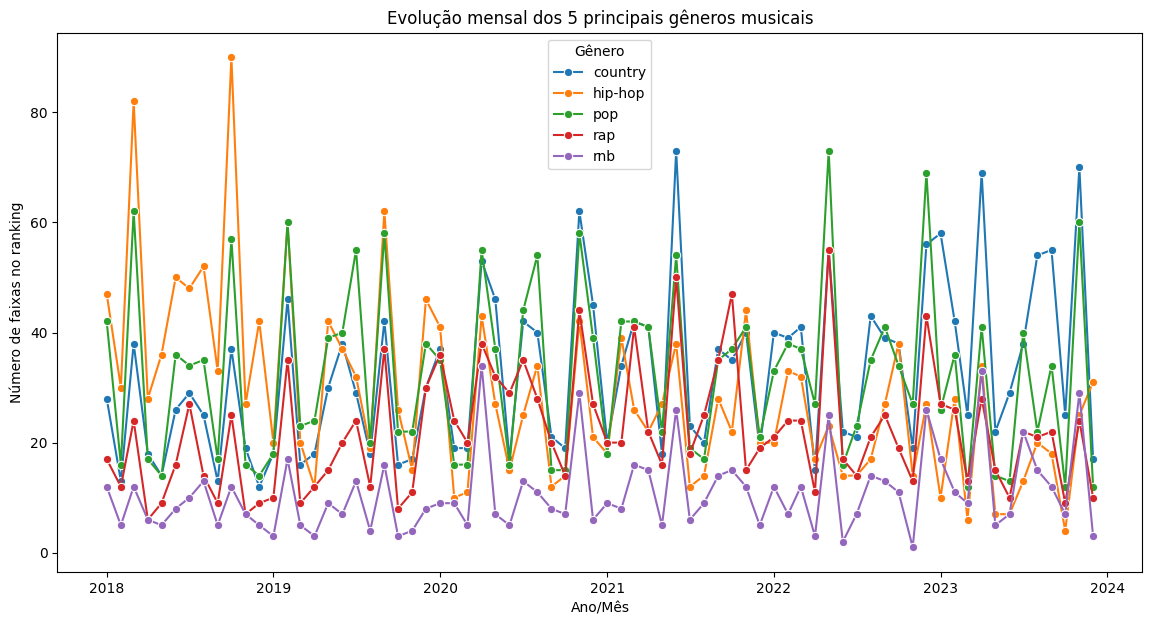

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Garantir que 'date' está no formato correto
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

# 2. Identificar os 5 gêneros mais frequentes em toda a base
top5_generos = df["genre"].value_counts().head(5).index.tolist()

# 3. Filtrar apenas esses gêneros
df_top5 = df[df["genre"].isin(top5_generos)]

# 4. Criar coluna de período mensal
df_top5["mes"] = df_top5["date"].dt.to_period("M").dt.to_timestamp()

# 5. Contagem por mês e gênero
generos_evolucao = df_top5.groupby(["mes","genre"]).size().reset_index(name="contagem")

# 6. Gráfico de linhas fluido
plt.figure(figsize=(14,7))
sns.lineplot(data=generos_evolucao, x="mes", y="contagem", hue="genre", marker="o")
plt.title("Evolução mensal dos 5 principais gêneros musicais")
plt.xlabel("Ano/Mês")
plt.ylabel("Número de faixas no ranking")
plt.legend(title="Gênero")
plt.show()

In [ ]:
import pandas as pd

# Garantir que as datas estão corretas
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")
df["release_date"] = pd.to_datetime(df["release_date"], dayfirst=True, errors="coerce")

# Calcular idade das faixas em dias
df["idade_dias"] = (df["date"] - df["release_date"]).dt.days

# Filtrar apenas faixas que têm release_date válido
df_idade = df.dropna(subset=["release_date", "idade_dias"])

# Calcular média por período
idade_media = df_idade.groupby("periodo")["idade_dias"].mean().reset_index()

# Converter para anos para facilitar a leitura
idade_media["idade_media_anos"] = (idade_media["idade_dias"] / 365).round(1)

# Forçar a ordem correta dos períodos
ordem = ["pré-pandemia", "pandemia", "pós-pandemia"]
idade_media["periodo"] = pd.Categorical(idade_media["periodo"], categories=ordem, ordered=True)
idade_media = idade_media.sort_values("periodo")

print(idade_media)

  periodo  idade_dias  idade_media_anos
0     NaN  639.438372               1.8
1     NaN  230.092981               0.6
2     NaN  811.326789               2.2


In [ ]:
import pandas as pd
import requests
import base64
import time

# ==================================
# 1. Credenciais do Spotify
# ==================================
client_id = "be02e8ac05714ce1bb9c015ba003eef2"
client_secret = "ed94a05988094955a436c6e9c00ca040"

def get_token(client_id, client_secret):
    auth_str = f"{client_id}:{client_secret}"
    b64_auth = base64.b64encode(auth_str.encode()).decode()

    headers = {"Authorization": f"Basic {b64_auth}"}
    data = {"grant_type": "client_credentials"}

    resp = requests.post("https://accounts.spotify.com/api/token", headers=headers, data=data)
    resp.raise_for_status()
    return resp.json()["access_token"]

token = get_token(client_id, client_secret)

# ==================================
# 2. Função para buscar BPM em lotes
# ==================================
def get_audio_features(ids, token):
    url = "https://api.spotify.com/v1/audio-features"
    headers = {"Authorization": f"Bearer {token}"}
    params = {"ids": ",".join(ids)}
    resp = requests.get(url, headers=headers, params=params)
    resp.raise_for_status()
    return resp.json()["audio_features"]

# ==================================
# 3. Carregar base
# ==================================
df = pd.read_excel("/content/track_ids.xlsx")

# Garantir unicidade dos IDs
unique_ids = df["spotify_id"].dropna().unique().tolist()

# ==================================
# 4. Buscar BPMs em blocos de 100 com time.sleep
# ==================================
batch_size = 100
bpm_data = []

for i in range(0, len(unique_ids), batch_size):
    batch = unique_ids[i:i+batch_size]
    features = get_audio_features(batch, token)
    for f in features:
        if f:  # às vezes retorna None
            bpm_data.append({"spotify_id": f["id"], "bpm": f["tempo"]})
    time.sleep(0.2)  # pausa de 200ms entre chamadas

# ==================================
# 5. Juntar BPMs de volta na base
# ==================================
bpm_df = pd.DataFrame(bpm_data)
df = df.merge(bpm_df, on="spotify_id", how="left")

# Salvar resultado
df.to_excel("/content/track_ids.xlsx", index=False)

print("Base enriquecida com BPM salva em planilha_com_bpm.xlsx")

HTTPError: 403 Client Error: Forbidden for url: https://api.spotify.com/v1/audio-features?ids=0tgVpDi06FyKpA1z0VMD4v%2C0e7ipj03S05BNilyu5bRzt%2C1rfofaqEpACxVEHIZBJe6W%2C2DQ1ITjI0YoLFzuADN1ZBW%2C1zB4vmk8tFRmM9UULNzbLB%2C43ZyHQITOjhciSUUNPVRHc%2C4wFjTWCunQFKtukqrNijEt%2C1mXVgsBdtIVeCLJnSnmtdV%2C3OzCF9i6Ey7EkkAYJztmKp%2C6PGoSes0D9eUDeeAafB2As%2C2ekn2ttSfGqwhhate0LSR0%2C0bYg9bo50gSsH3LtXe2SQn%2C0dIoGTQXDh1wVnhIiSyYEa%2C2HBtd9MYDd2xDVu8Zc6pwt%2C75ZvA4QfFiZvzhj2xkaWAh%2C52okn5MNA47tk87PeZJLEL%2C5Z3GHaZ6ec9bsiI5BenrbY%2C7qiZfU4dY1lWllzX7mPBI3%2C0yvPEnB032fojLfVluFjUv%2C2j5hsQvApottzvTn4pFJWF%2C1XRgIKC5TPwo7nWGyKqgG0%2C6QgjcU0zLnzq5OrUoSZ3OK%2C5k38wzpLb15YgncyWdTZE4%2C0pqnGHJpmpxLKifKRmU6WP%2C4e4fqjx0Izh4svvTef1z7e%2C6wmAHw1szh5RCKSRjiXhPe%2C5eqK0tbzUPo2SoeZsov04s%2C0tBbt8CrmxbjRP0pueQkyU%2C6habFhsOp2NvshLv26DqMb%2C4dVpf9jZjcORqGTLUaeYj9%2C7COfe3P7KgfwDwIRB8LIDw%2C6gU9OKjOE7ghfEd55oRO57%2C5tz69p7tJuGPeMGwNTxYuV%2C2eAZfqOm4EnOF9VvN50Tyc%2C2EjXfH91m7f8HiJN1yQg97%2C0KKkJNfGyhkQ5aFogxQAPU%2C5hslUAKq9I9CG2bAulFkHN%2C5cF0dROlMOK5uNZtivgu50%2C2x0WlnmfG39ZuDmstl9xfX%2C5WoaF1B5XIEnWfmb5NZikf%2C4PS1e8f2LvuTFgUs1Cn3ON%2C1cS0TgbR263ey9jn0MwD2s%2C7vGuf3Y35N4wmASOKLUVVU%2C0OWZFobGSIW9GrSlQ9C5pc%2C77khP2fIVhSW23NwxrRluh%2C3B54sVLJ402zGa6Xm4YGNe%2C0Qh38w01QRXK6KHIv0e3hb%2C4PpuH4mxL0rD35mOWaLoKS%2C32lItqlMi4LBhb4k0BaSaC%2C40oKW22ZNNkEdZLJTScaQI%2C2SbzdGpOKlH3HIAGTWTbwU%2C7sO5G9EABYOXQKNPNiE9NR%2C0hkR93a0LriV2CQUhSXw3h%2C5Gu0PDLN4YJeW75PpBSg9p%2C3T6MAweakkNrMYs8jZIWtg%2C2yQZwi1P8AkkxxFhQ8rMEK%2C6V4KHt9xu4TPEnDFoBeacT%2C2Za1AlJNvksouPPWbXpR2X%2C2yLa0QULdQr0qAIvVwN6B5%2C3I4WFddKpe2PGZWFh7f10J%2C609qKv3KPAbdtp0LQH2buA%2C3wGXyJGsCf1myH5MooQIqE%2C4vwfOiyWxXeEdx4ejAJgdx%2C1P17dC1amhFzptugyAO7Il%2C40LaNujg5lvImKt0N4xDge%2C7J6bnDDitOwfelaJNixHhL%2C7ER7vcy7u2ajg5IV45WBFw%2C4DTpngLjoHj5gFxEZFeD3J%2C628Ueb4sRiXApObhcU9iPU%2C52ioLaTnO2J7BWY8UN2n9D%2C5w3NgfV8v1nNZFLUBlGHIL%2C0mlAOSILGRys2IbvyOT5VJ%2C4vaxvNDaLSoD36iZX515ug%2C6waqLPcT6ruMhmd36OhmFO%2C57IRaiAB4hBZu3gnNVZC0v%2C21RCuMVSlblTmyYm2DnPCR%2C5jZF1nvKORdaHNjNNMRbFl%2C3wdfLVUhmX64lIyWIIEW8s%2C09iyGiljLWRYXdRazFkdtJ%2C01380RE6UfsPSdiUIwrCoH%2C6urLjX35oXXRYtcH1b3dCh%2C7CEJH5Ed7FBbXF6CqBQPlJ%2C0dSIrRkA4PadGll16TgbnV%2C2A69wys3S9uiPSmn6UZWJn%2C5vuiHi3QYbwcm1OKJOYnrf%2C7FfpP3YZ6fOWMdxkIAtud9%2C3qTmB5HxP9ilJaiM6B1yuk%2C7g7raxdQpiLZT7aOlib4S1%2C2AY1UAimvTqjJC8vDJsOyy%2C7foypmc7KZyU716Yv63BPe%2C7CcoUAtUcYhUfBsmtn0ajO%2C2UVbBKQOdFAekPTRsnkzcf%2C0OI7AFifLSoGzpb8bdBLLV%2C4UKCKdYiLN6IMA5ZESUTL7%2C6vlxmQGwmlyp07YjkugV6K%2C39jXnbACjiaiTwwhsr5sY5%2C3e7sxremeOE3wTySiOhGiP%2C1psC5iHzQxaTMZ5dWGfM6I%2C3Vo4wInECJQuz9BIBMOu8i%2C4eWQlBRaTjPPUlzacqEeoQ

In [ ]:
import requests, base64

client_id = "be02e8ac05714ce1bb9c015ba003eef2"
client_secret = "ed94a05988094955a436c6e9c00ca040"

def get_token(client_id, client_secret):
    auth_str = f"{client_id}:{client_secret}"
    b64_auth = base64.b64encode(auth_str.encode()).decode()

    headers = {"Authorization": f"Basic {b64_auth}"}
    data = {"grant_type": "client_credentials"}

    resp = requests.post("https://accounts.spotify.com/api/token", headers=headers, data=data)

    # Mostrar resposta completa em caso de erro
    if resp.status_code != 200:
        print("Erro ao gerar token:", resp.status_code, resp.text)
        resp.raise_for_status()

    return resp.json()["access_token"]

# Teste
token = get_token(client_id, client_secret)
print("TOKEN GERADO:", token[:50] + "...")

In [ ]:
import requests

token = 'BQCVQjS6qaqdqRzixj7B29DZDi5qkivPJLScgU5uhlfLYNUaWX'

headers = {"Authorization": f"Bearer {token}"}

spotify_id = "0tgVpDi06FyKpA1z0VMD4v"  # Exemplo: Ed Sheeran - Perfect
url = f"https://api.spotify.com/v1/audio-features/{spotify_id}"

resp = requests.get(url, headers=headers)
print(resp.json())

In [ ]:
import requests, base64

client_id = "be02e8ac05714ce1bb9c015ba003eef2"
client_secret = "ed94a05988094955a436c6e9c00ca040"

# Função para gerar token sempre que precisar
def get_token(client_id, client_secret):
    auth_str = f"{client_id}:{client_secret}"
    b64_auth = base64.b64encode(auth_str.encode()).decode()

    headers = {"Authorization": f"Basic {b64_auth}"}
    data = {"grant_type": "client_credentials"}

    resp = requests.post("https://accounts.spotify.com/api/token", headers=headers, data=data)
    resp.raise_for_status()
    return resp.json()["access_token"]

# Gera o token
token = get_token(client_id, client_secret)

# Testa 1 faixa
spotify_id = "0tgVpDi06FyKpA1z0VMD4v"  # Perfect - Ed Sheeran
url = f"https://api.spotify.com/v1/audio-features/{spotify_id}"

headers = {"Authorization": f"Bearer {token}"}
resp = requests.get(url, headers=headers)

print(resp.status_code)
print(resp.json())

In [ ]:
!pip install tqdm
from tqdm import tqdm

In [ ]:
import pandas as pd
from tqdm import tqdm

# ==========================
# 1. Carregar as bases
# ==========================
df = pd.read_excel("/content/planilha_unida.xlsx")
spotify_features = pd.read_excel("/content/SpotifyFeatures v2.xlsx")  # geralmente essa base é CSV

# ==========================
# 2. Garantir unicidade em track_id
# ==========================
spotify_features = spotify_features.drop_duplicates(subset=["track_id"])

# Criar um dicionário para lookup rápido
lookup = spotify_features.set_index("track_id")[["duration_ms", "mode", "tempo"]].to_dict(orient="index")

# ==========================
# 3. Preencher manualmente com tqdm
# ==========================
duration, mode, tempo = [], [], []

for sid in tqdm(df["spotify_id"], desc="Processando IDs"):
    if sid in lookup:
        duration.append(lookup[sid]["duration_ms"])
        mode.append(lookup[sid]["mode"])
        tempo.append(lookup[sid]["tempo"])
    else:
        duration.append(None)
        mode.append(None)
        tempo.append(None)

df["duration_ms"] = duration
df["mode"] = mode
df["tempo"] = tempo

# ==========================
# 4. Salvar resultado
# ==========================
df.to_excel("/content/planilha_unida_enriquecida.xlsx", index=False)

print("✅ Base enriquecida salva em /content/planilha_unida_enriquecida.xlsx")

Processando IDs: 100%|██████████| 31300/31300 [00:00<00:00, 1378951.67it/s]


✅ Base enriquecida salva em /content/planilha_unida_enriquecida.xlsx


In [ ]:
from google.colab import files
files.download("/content/planilha_unida_enriquecida.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from tqdm.notebook import tqdm

# ==========================
# 1. Carregar as bases
# ==========================
df = pd.read_excel("/content/planilha_unida_enriquecida.xlsx")
spotify_top = pd.read_excel("/content/spotify_top_songs_audio_features.xlsx")  # geralmente é CSV

# ==========================
# 2. Garantir unicidade no track_id
# ==========================
spotify_top = spotify_top.drop_duplicates(subset=["id"])

# Criar lookup dict
lookup = spotify_top.set_index("id")[["duration_ms", "mode", "tempo"]].to_dict(orient="index")

# ==========================
# 3. Preencher apenas valores faltantes
# ==========================
for i, sid in tqdm(enumerate(df["spotify_id"]), total=len(df), desc="Atualizando IDs", unit="faixa"):
    if pd.isna(df.at[i, "duration_ms"]) and sid in lookup:
        df.at[i, "duration_ms"] = lookup[sid]["duration_ms"]
    if pd.isna(df.at[i, "mode"]) and sid in lookup:
        df.at[i, "mode"] = lookup[sid]["mode"]
    if pd.isna(df.at[i, "tempo"]) and sid in lookup:
        df.at[i, "tempo"] = lookup[sid]["tempo"]

# ==========================
# 4. Salvar resultado
# ==========================
df.to_excel("/content/planilha_unida_enriquecida_final.xlsx", index=False)

from google.colab import files
files.download("/content/planilha_unida_enriquecida_final.xlsx")

print("✅ Base final enriquecida salva em /content/planilha_unida_enriquecida_final.xlsx")

Atualizando IDs:   0%|          | 0/31300 [00:00<?, ?faixa/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Base final enriquecida salva em /content/planilha_unida_enriquecida_final.xlsx


In [ ]:
import pandas as pd
from tqdm.notebook import tqdm

# ==========================
# 1. Carregar as bases
# ==========================
df = pd.read_excel("/content/planilha_unida_enriquecida_final.xlsx")
playlist_ref = pd.read_excel("/content/playlist_2010to2023.xlsx")  # geralmente é CSV

# ==========================
# 2. Garantir unicidade em track_id
# ==========================
playlist_ref = playlist_ref.drop_duplicates(subset=["track_id"])

# Criar lookup dict
lookup = playlist_ref.set_index("track_id")[["duration_ms", "mode", "tempo"]].to_dict(orient="index")

# ==========================
# 3. Preencher apenas valores faltantes
# ==========================
for i, sid in tqdm(enumerate(df["spotify_id"]), total=len(df), desc="Atualizando IDs", unit="faixa"):
    if pd.isna(df.at[i, "duration_ms"]) and sid in lookup:
        df.at[i, "duration_ms"] = lookup[sid]["duration_ms"]
    if pd.isna(df.at[i, "mode"]) and sid in lookup:
        df.at[i, "mode"] = lookup[sid]["mode"]
    if pd.isna(df.at[i, "tempo"]) and sid in lookup:
        df.at[i, "tempo"] = lookup[sid]["tempo"]

# ==========================
# 4. Salvar resultado
# ==========================
df.to_excel("/content/planilha_unida_enriquecida_com_playlist.xlsx", index=False)

from google.colab import files
files.download("/content/planilha_unida_enriquecida_com_playlist.xlsx")

print("✅ Base final enriquecida com playlist_2010to2023 salva em /content/planilha_unida_enriquecida_com_playlist.xlsx")

Atualizando IDs:   0%|          | 0/31300 [00:00<?, ?faixa/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Base final enriquecida com playlist_2010to2023 salva em /content/planilha_unida_enriquecida_com_playlist.xlsx


In [ ]:
import pandas as pd
from tqdm.notebook import tqdm

# ==========================
# 1. Carregar as bases
# ==========================
df = pd.read_excel("/content/planilha_unida_enriquecida_com_playlist.xlsx")
data_ref = pd.read_excel("/content/data.xlsx")  # ajuste se for .xlsx

# ==========================
# 2. Garantir unicidade em track_id
# ==========================
data_ref = data_ref.drop_duplicates(subset=["id"])

# Criar lookup dict
lookup = data_ref.set_index("id")[["duration_ms", "mode", "tempo"]].to_dict(orient="index")

# ==========================
# 3. Preencher apenas valores faltantes
# ==========================
for i, sid in tqdm(enumerate(df["spotify_id"]), total=len(df), desc="Atualizando IDs", unit="faixa"):
    if pd.isna(df.at[i, "duration_ms"]) and sid in lookup:
        df.at[i, "duration_ms"] = lookup[sid]["duration_ms"]
    if pd.isna(df.at[i, "mode"]) and sid in lookup:
        df.at[i, "mode"] = lookup[sid]["mode"]
    if pd.isna(df.at[i, "tempo"]) and sid in lookup:
        df.at[i, "tempo"] = lookup[sid]["tempo"]

# ==========================
# 4. Salvar resultado
# ==========================
df.to_excel("/content/planilha_unida_enriquecida_com_data.xlsx", index=False)

from google.colab import files
files.download("/content/planilha_unida_enriquecida_com_data.xlsx")

print("✅ Base final enriquecida com 'data' salva em /content/planilha_unida_enriquecida_com_data.xlsx")

Atualizando IDs:   0%|          | 0/31300 [00:00<?, ?faixa/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Base final enriquecida com 'data' salva em /content/planilha_unida_enriquecida_com_data.xlsx


In [ ]:
import pandas as pd
from tqdm.notebook import tqdm

# ==========================
# 1. Carregar as bases
# ==========================
df = pd.read_excel("/content/planilha_unida_enriquecida_com_data.xlsx")
data_ref = pd.read_excel("/content/Final database.xlsx")  # ajuste se for .xlsx

# ==========================
# 2. Garantir unicidade em track_id
# ==========================
data_ref = data_ref.drop_duplicates(subset=["id"])

# Criar lookup dict
lookup = data_ref.set_index("id")[["duration_ms", "mode", "tempo"]].to_dict(orient="index")

# ==========================
# 3. Preencher apenas valores faltantes
# ==========================
for i, sid in tqdm(enumerate(df["spotify_id"]), total=len(df), desc="Atualizando IDs", unit="faixa"):
    if pd.isna(df.at[i, "duration_ms"]) and sid in lookup:
        df.at[i, "duration_ms"] = lookup[sid]["duration_ms"]
    if pd.isna(df.at[i, "mode"]) and sid in lookup:
        df.at[i, "mode"] = lookup[sid]["mode"]
    if pd.isna(df.at[i, "tempo"]) and sid in lookup:
        df.at[i, "tempo"] = lookup[sid]["tempo"]

# ==========================
# 4. Salvar resultado
# ==========================
df.to_excel("/content/planilha_unida_enriquecida_final.xlsx", index=False)

from google.colab import files
files.download("/content/planilha_unida_enriquecida_final.xlsx")

print("✅ Base final enriquecida com 'data' salva em /content/planilha_unida_enriquecida_final.xlsx")

Atualizando IDs:   0%|          | 0/31300 [00:00<?, ?faixa/s]

/tmp/ipython-input-172403487.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '142.04' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[i, "tempo"] = lookup[sid]["tempo"]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Base final enriquecida com 'data' salva em /content/planilha_unida_enriquecida_final.xlsx


In [ ]:
import pandas as pd
from tqdm.notebook import tqdm

# ==========================
# 1. Carregar as bases
# ==========================
df = pd.read_excel("/content/planilha_unida_enriquecida_final.xlsx")
data_ref = pd.read_excel("/content/data_songs.xlsx")  # ajuste se for .xlsx

# ==========================
# 2. Garantir unicidade em track_id
# ==========================
data_ref = data_ref.drop_duplicates(subset=["id"])

# Criar lookup dict
lookup = data_ref.set_index("id")[["duration_ms", "mode", "tempo"]].to_dict(orient="index")

# ==========================
# 3. Preencher apenas valores faltantes
# ==========================
for i, sid in tqdm(enumerate(df["spotify_id"]), total=len(df), desc="Atualizando IDs", unit="faixa"):
    if pd.isna(df.at[i, "duration_ms"]) and sid in lookup:
        df.at[i, "duration_ms"] = lookup[sid]["duration_ms"]
    if pd.isna(df.at[i, "mode"]) and sid in lookup:
        df.at[i, "mode"] = lookup[sid]["mode"]
    if pd.isna(df.at[i, "tempo"]) and sid in lookup:
        df.at[i, "tempo"] = lookup[sid]["tempo"]

# ==========================
# 4. Salvar resultado
# ==========================
df.to_excel("/content/planilha_unida_enriquecida_final_.xlsx", index=False)

from google.colab import files
files.download("/content/planilha_unida_enriquecida_final_.xlsx")

print("✅ Base final enriquecida com 'data' salva em /content/planilha_unida_enriquecida_final_.xlsx")

Atualizando IDs:   0%|          | 0/31300 [00:00<?, ?faixa/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Base final enriquecida com 'data' salva em /content/planilha_unida_enriquecida_final_.xlsx


In [ ]:
import pandas as pd
from tqdm.notebook import tqdm

# ==========================
# 1. Carregar as bases
# ==========================
df = pd.read_excel("/content/planilha_unida_enriquecida_final_.xlsx")
data_ref = pd.read_excel("/content/top_10000_1950-now.xlsx")  # ajuste se for .xlsx

# ==========================
# 2. Garantir unicidade em track_id
# ==========================
data_ref = data_ref.drop_duplicates(subset=["id"])

# Criar lookup dict
lookup = data_ref.set_index("id")[["duration_ms", "mode", "tempo"]].to_dict(orient="index")

# ==========================
# 3. Preencher apenas valores faltantes
# ==========================
for i, sid in tqdm(enumerate(df["spotify_id"]), total=len(df), desc="Atualizando IDs", unit="faixa"):
    if pd.isna(df.at[i, "duration_ms"]) and sid in lookup:
        df.at[i, "duration_ms"] = lookup[sid]["duration_ms"]
    if pd.isna(df.at[i, "mode"]) and sid in lookup:
        df.at[i, "mode"] = lookup[sid]["mode"]
    if pd.isna(df.at[i, "tempo"]) and sid in lookup:
        df.at[i, "tempo"] = lookup[sid]["tempo"]

# ==========================
# 4. Salvar resultado
# ==========================
df.to_excel("/content/planilha_unida_enriquecida_final.xlsx", index=False)

from google.colab import files
files.download("/content/planilha_unida_enriquecida_final.xlsx")

print("✅ Base final enriquecida com 'data' salva em /content/planilha_unida_enriquecida_final.xlsx")

Atualizando IDs:   0%|          | 0/31300 [00:00<?, ?faixa/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Base final enriquecida com 'data' salva em /content/planilha_unida_enriquecida_final.xlsx


In [ ]:
import pandas as pd
from tqdm.notebook import tqdm

# ==========================
# 1. Carregar as bases
# ==========================
df = pd.read_excel("/content/planilha_unida_enriquecida_final_.xlsx")
data_ref = pd.read_excel("/content/top_10000_1950-now.xlsx")  # ajuste se for .xlsx

# ==========================
# 2. Garantir unicidade em track_id
# ==========================
data_ref = data_ref.drop_duplicates(subset=["id"])

# Criar lookup dict
lookup = data_ref.set_index("id")[["duration_ms", "mode", "tempo"]].to_dict(orient="index")

# ==========================
# 3. Preencher apenas valores faltantes
# ==========================
for i, sid in tqdm(enumerate(df["spotify_id"]), total=len(df), desc="Atualizando IDs", unit="faixa"):
    if pd.isna(df.at[i, "duration_ms"]) and sid in lookup:
        df.at[i, "duration_ms"] = lookup[sid]["duration_ms"]
    if pd.isna(df.at[i, "mode"]) and sid in lookup:
        df.at[i, "mode"] = lookup[sid]["mode"]
    if pd.isna(df.at[i, "tempo"]) and sid in lookup:
        df.at[i, "tempo"] = lookup[sid]["tempo"]

# ==========================
# 4. Salvar resultado
# ==========================
df.to_excel("/content/planilha_unida_enriquecida_final.xlsx", index=False)

from google.colab import files
files.download("/content/planilha_unida_enriquecida_final.xlsx")

print("✅ Base final enriquecida com 'data' salva em /content/planilha_unida_enriquecida_final.xlsx")

In [ ]:
import requests

url = "https://api.reccobeats.com/v1/track/:id/audio-features"

payload = {}
headers = {
  'Accept': 'application/json'
}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)

In [ ]:
import pandas as pd
from google.colab import files

# Carregar base
df = pd.read_excel("/content/planilha_unida_enriquecida_final v2.xlsx")

# Pegar os 50 primeiros registros de cada data
df_nova = df.groupby("date").head(50)

# Salvar
df_nova.to_excel("base_final.xlsx", index=False)

# Fazer download
files.download("base_final.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df = pd.read_excel('/content/base_final.xlsx')  # ou outro nome de arquivo

# Total de linhas
total_linhas = len(df)

# Calcular percentual de preenchimento por coluna
percentual_preenchimento = df.notnull().sum() / total_linhas * 100

# Exibir resultado formatado
print(percentual_preenchimento.round(2).sort_values(ascending=False))

rank            100.00
title           100.00
artist          100.00
main_artist     100.00
date            100.00
spotify_id       99.42
duration         99.42
release_date     99.38
status           99.32
api_title        99.32
genre            98.63
duration_ms      81.50
mode             81.50
tempo            81.50
dtype: float64
